LET'S IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


LET'S LOAD DATASET

In [26]:
df = pd.read_csv('dataset.csv')
df.head()
#BELOW, NaN MEANS MISSING VALUE

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


BELOW VALUES ARE THE COUNT OF MISSING VALUES

In [27]:
print(df.isnull().sum())

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [23]:
df['Diastolic_BP'] = df['Diastolic_BP'].fillna(df['Diastolic_BP'].mean())
df['Skin_Fold'] = df['Skin_Fold'].fillna(df['Skin_Fold'].mean())
df['Serum_Insulin'] = df['Serum_Insulin'].fillna(df['Serum_Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [38]:
print(df.isnull().sum())

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


In [50]:
for column in columns_to_check:
    print(f"Remaining data points in {column}: {len(df[column])}")


Remaining data points in Pregnant: 0
Remaining data points in Glucose: 0
Remaining data points in Diastolic_BP: 0
Remaining data points in Skin_Fold: 0
Remaining data points in Serum_Insulin: 0
Remaining data points in BMI: 0
Remaining data points in Diabetes_Pedigree: 0
Remaining data points in Age: 0


In [51]:
for column in columns_to_check:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in Pregnant: []
Unique values in Glucose: []
Unique values in Diastolic_BP: []
Unique values in Skin_Fold: []
Unique values in Serum_Insulin: []
Unique values in BMI: []
Unique values in Diabetes_Pedigree: []
Unique values in Age: []


In [52]:
print(df[columns_to_check].describe())


       Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin  BMI  \
count       0.0      0.0           0.0        0.0            0.0  0.0   
mean        NaN      NaN           NaN        NaN            NaN  NaN   
std         NaN      NaN           NaN        NaN            NaN  NaN   
min         NaN      NaN           NaN        NaN            NaN  NaN   
25%         NaN      NaN           NaN        NaN            NaN  NaN   
50%         NaN      NaN           NaN        NaN            NaN  NaN   
75%         NaN      NaN           NaN        NaN            NaN  NaN   
max         NaN      NaN           NaN        NaN            NaN  NaN   

       Diabetes_Pedigree  Age  
count                0.0  0.0  
mean                 NaN  NaN  
std                  NaN  NaN  
min                  NaN  NaN  
25%                  NaN  NaN  
50%                  NaN  NaN  
75%                  NaN  NaN  
max                  NaN  NaN  


In [59]:
for column in columns_to_check:
    print(f"{column} - Number of missing values: {df[column].isnull().sum()}")
    print(f"{column} - Unique values: {df[column].unique()}")


Pregnant - Number of missing values: 0
Pregnant - Unique values: []
Glucose - Number of missing values: 0
Glucose - Unique values: []
Diastolic_BP - Number of missing values: 0
Diastolic_BP - Unique values: []
Skin_Fold - Number of missing values: 0
Skin_Fold - Unique values: []
Serum_Insulin - Number of missing values: 0
Serum_Insulin - Unique values: []
BMI - Number of missing values: 0
BMI - Unique values: []
Diabetes_Pedigree - Number of missing values: 0
Diabetes_Pedigree - Unique values: []
Age - Number of missing values: 0
Age - Unique values: []


In [61]:
print(df.dtypes)


Pregnant               int64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object


In [62]:
for column in columns_to_check:
    print(f"Data points remaining in {column}: {df[column].count()}")


Data points remaining in Pregnant: 0
Data points remaining in Glucose: 0
Data points remaining in Diastolic_BP: 0
Data points remaining in Skin_Fold: 0
Data points remaining in Serum_Insulin: 0
Data points remaining in BMI: 0
Data points remaining in Diabetes_Pedigree: 0
Data points remaining in Age: 0


In [63]:
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):
    # Calculate Z-scores
    z_scores = stats.zscore(df[column].dropna())
    
    # Filter data within the Z-score threshold
    df_filtered = df[(abs(z_scores) < threshold)]
    return df_filtered



Pregnant - Number of missing values: 0
Pregnant - Unique values: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Pregnant - Data type: int64


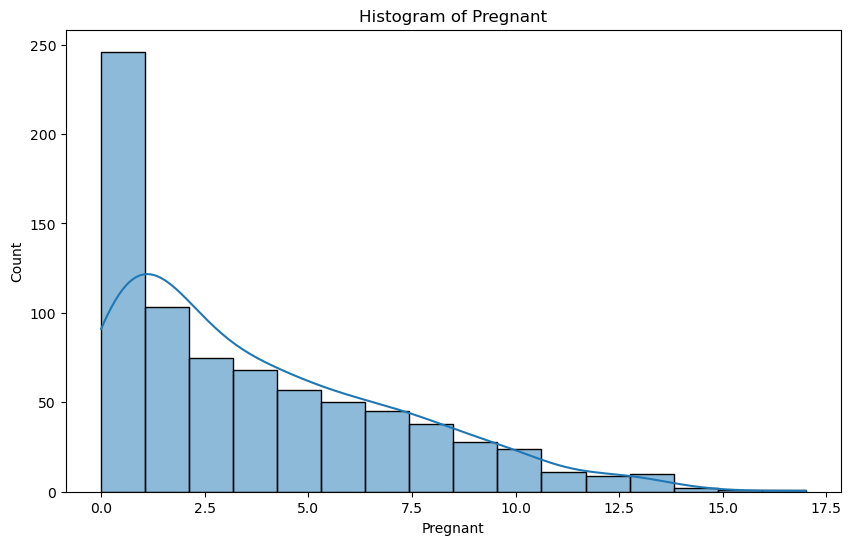

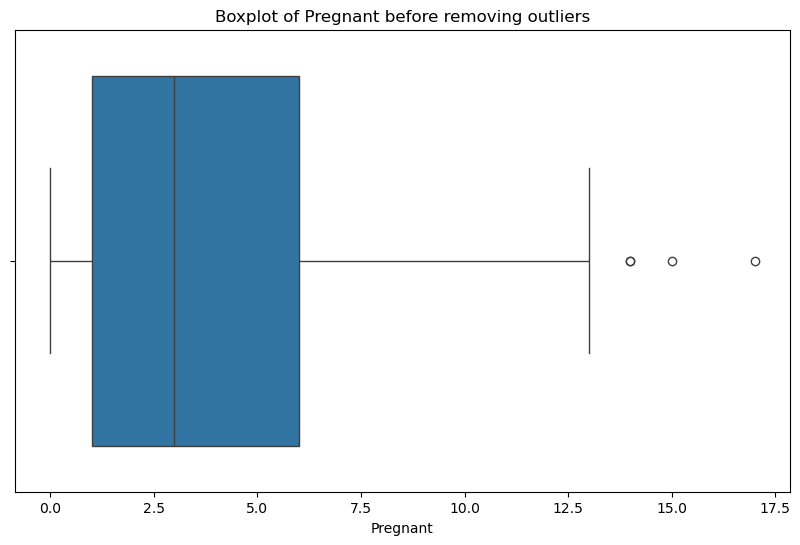

Data points remaining in Pregnant after outlier removal: 768


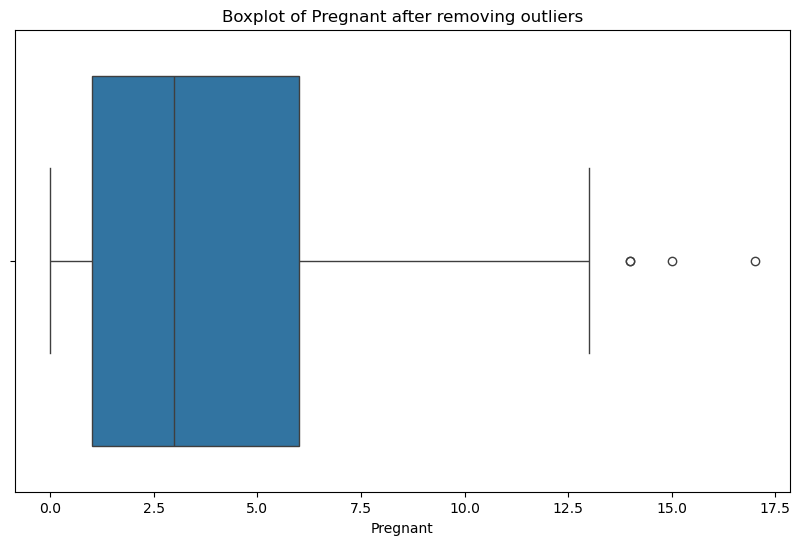


Glucose - Number of missing values: 0
Glucose - Unique values: [148.          85.         183.          89.         137.
 116.          78.         115.         197.         125.
 110.         168.         139.         189.         166.
 100.         118.         107.         103.         126.
  99.         196.         119.         143.         147.
  97.         145.         117.         109.         158.
  88.          92.         122.         138.         102.
  90.         111.         180.         133.         106.
 171.         159.         146.          71.         105.
 101.         176.         150.          73.         187.
  84.          44.         141.         114.          95.
 129.          79.         121.68676278  62.         131.
 112.         113.          74.          83.         136.
  80.         123.          81.         134.         142.
 144.          93.         163.         151.          96.
 155.          76.         160.         124.         162.
 132.   

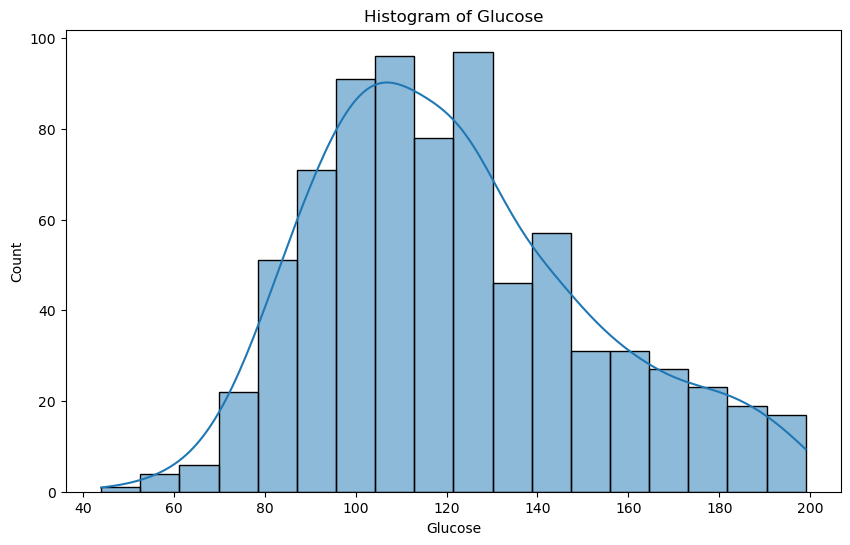

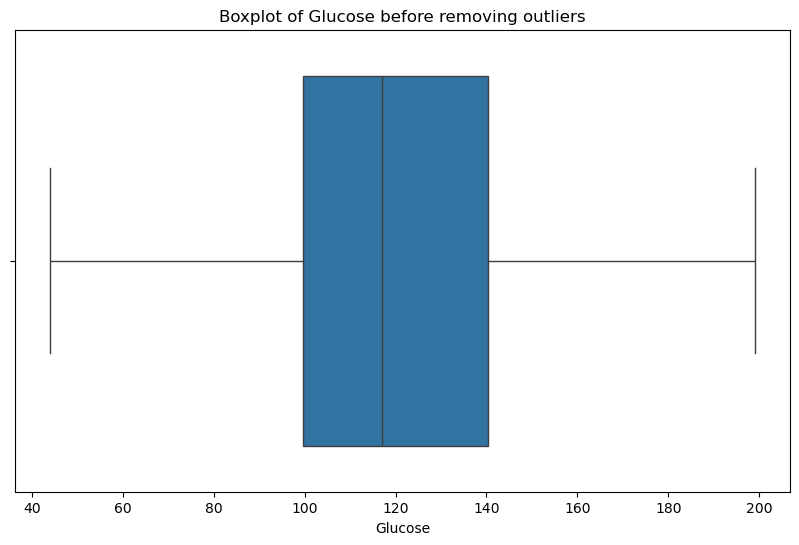

Data points remaining in Glucose after outlier removal: 768


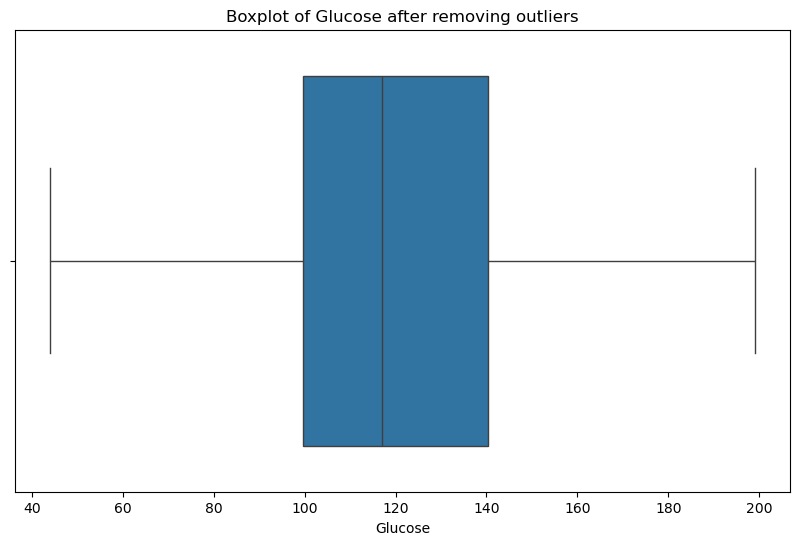


Diastolic_BP - Number of missing values: 0
Diastolic_BP - Unique values: [ 72.          66.          64.          40.          74.
  50.          72.40518417  70.          96.          92.
  80.          60.          84.          30.          88.
  90.          94.          76.          82.          75.
  58.          78.          68.         110.          56.
  62.          85.          86.          48.          44.
  65.         108.          55.         122.          54.
  52.          98.         104.          95.          46.
 102.         100.          61.          24.          38.
 106.         114.        ]
Diastolic_BP - Data type: float64


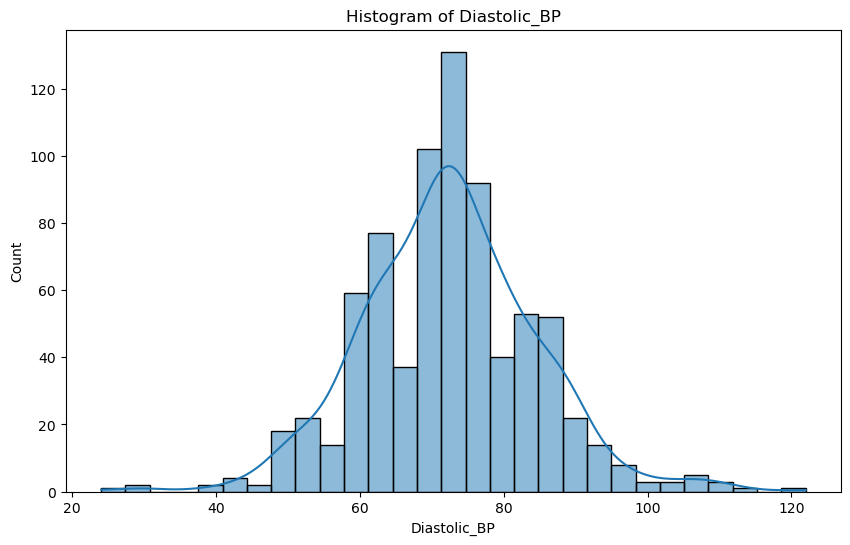

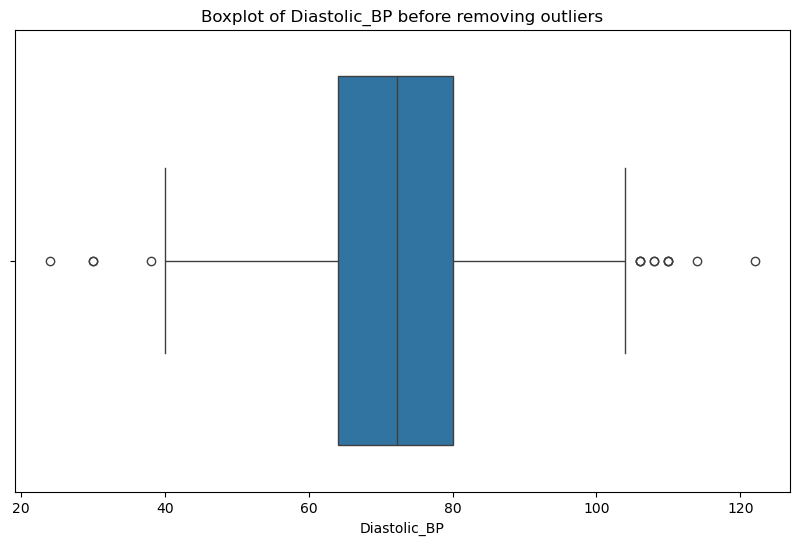

Data points remaining in Diastolic_BP after outlier removal: 768


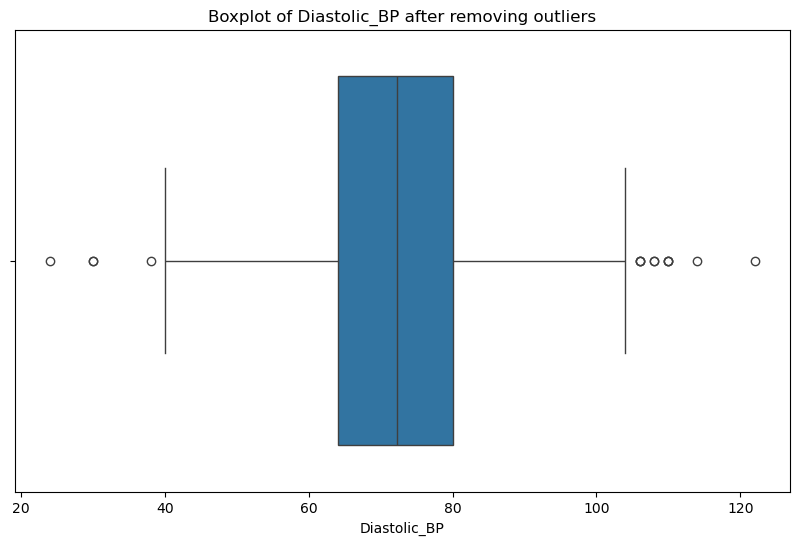


Skin_Fold - Number of missing values: 0
Skin_Fold - Unique values: [35.         29.         29.15341959 23.         32.         45.
 19.         47.         38.         30.         41.         33.
 26.         15.         36.         11.         31.         37.
 42.         25.         18.         24.         39.         27.
 21.         34.         10.         60.         13.         20.
 22.         28.         54.         40.         51.         56.
 14.         17.         50.         44.         12.         46.
 16.          7.         52.         43.         48.          8.
 49.         63.         99.        ]
Skin_Fold - Data type: float64


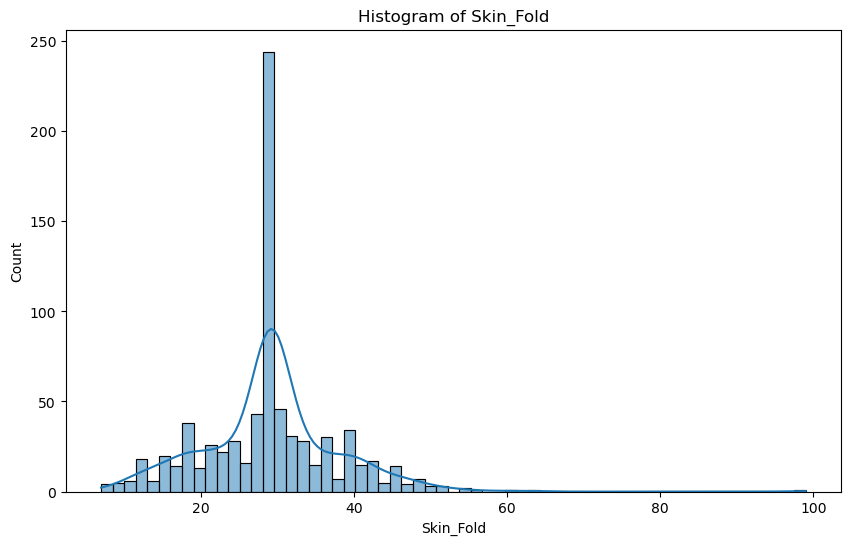

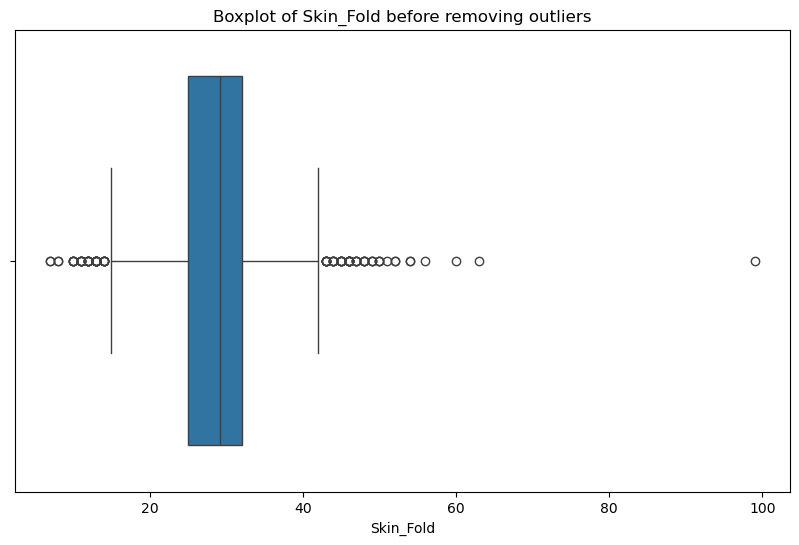

Data points remaining in Skin_Fold after outlier removal: 762


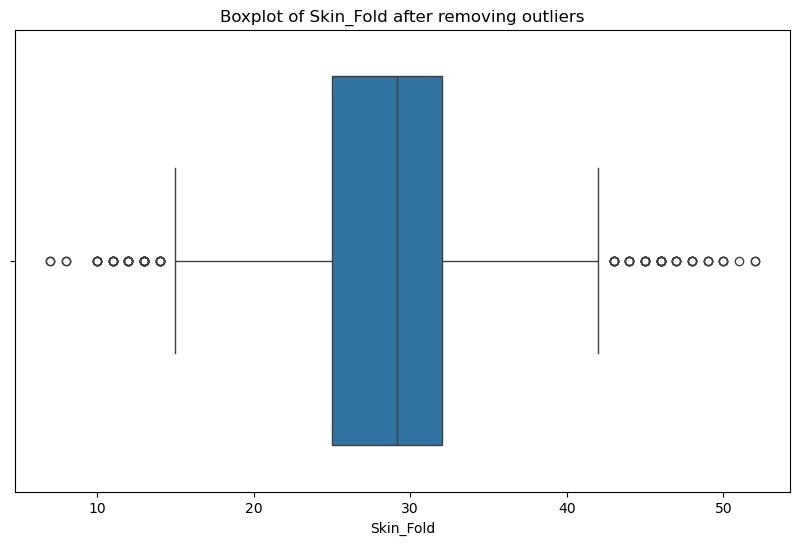


Serum_Insulin - Number of missing values: 0
Serum_Insulin - Unique values: [155.54822335  94.         168.          88.         543.
 846.         175.         230.          83.          96.
 235.         146.         115.         140.         110.
 245.          54.         192.         207.          70.
 240.          82.          36.          23.         300.
 342.         304.         142.         128.          38.
 100.          90.         270.          71.         125.
 176.          48.          64.         228.          76.
 220.          40.         152.          18.         135.
 495.          37.          51.          99.         145.
 225.          49.          50.          92.         325.
  63.         284.         119.         204.         155.
 485.          53.         114.         105.         285.
 156.          78.         130.          55.          58.
 160.         210.         318.          44.         190.
 280.          87.         271.         129.         1

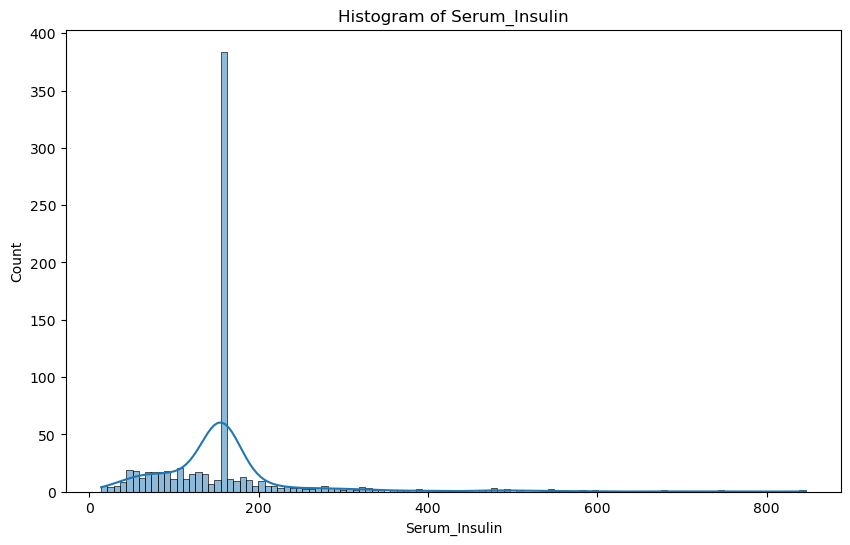

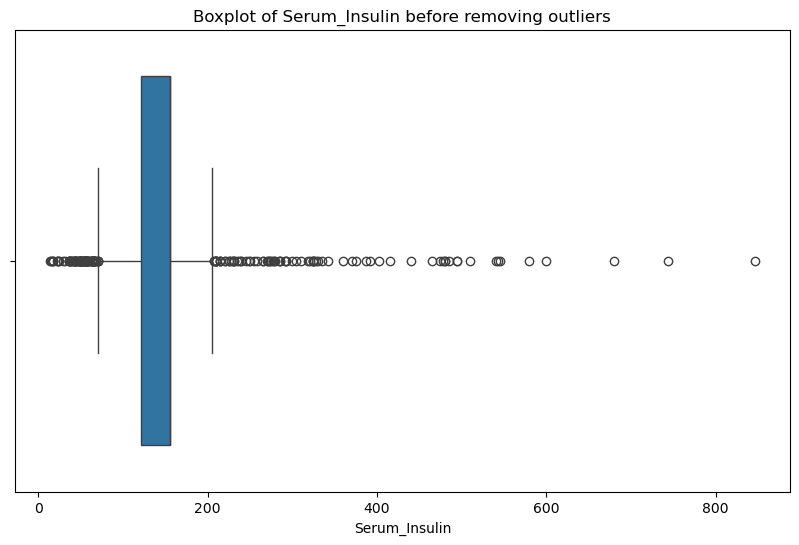

Data points remaining in Serum_Insulin after outlier removal: 708


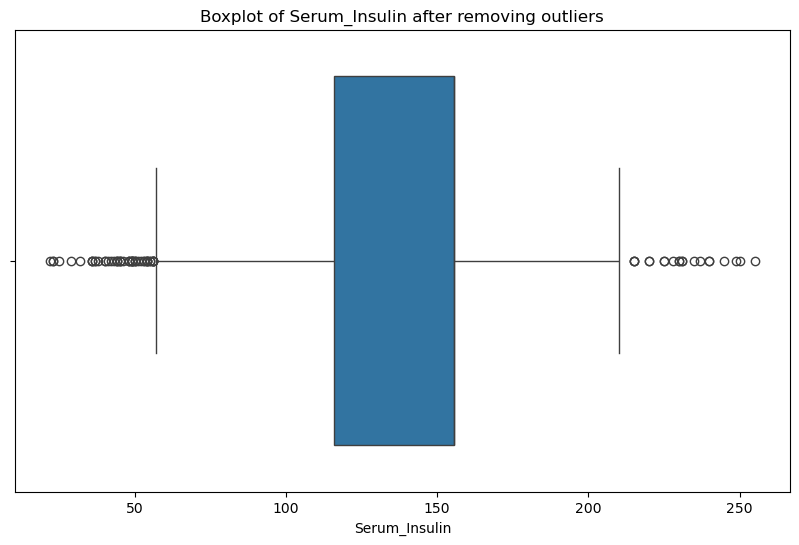


BMI - Number of missing values: 0
BMI - Unique values: [33.6        26.6        23.3        28.1        43.1        25.6
 31.         35.3        30.5        32.45746367 37.6        38.
 27.1        30.1        25.8        30.         45.8        29.6
 43.3        34.6        39.3        35.4        39.8        29.
 36.6        31.1        39.4        23.2        22.2        34.1
 36.         31.6        24.8        19.9        27.6        24.
 33.2        32.9        38.2        37.1        34.         40.2
 22.7        45.4        27.4        42.         29.7        28.
 39.1        19.4        24.2        24.4        33.7        34.7
 23.         37.7        46.8        40.5        41.5        25.
 25.4        32.8        32.5        42.7        19.6        28.9
 28.6        43.4        35.1        32.         24.7        32.6
 43.2        22.4        29.3        24.6        48.8        32.4
 38.5        26.5        19.1        46.7        23.8        33.9
 20.4        28.7        

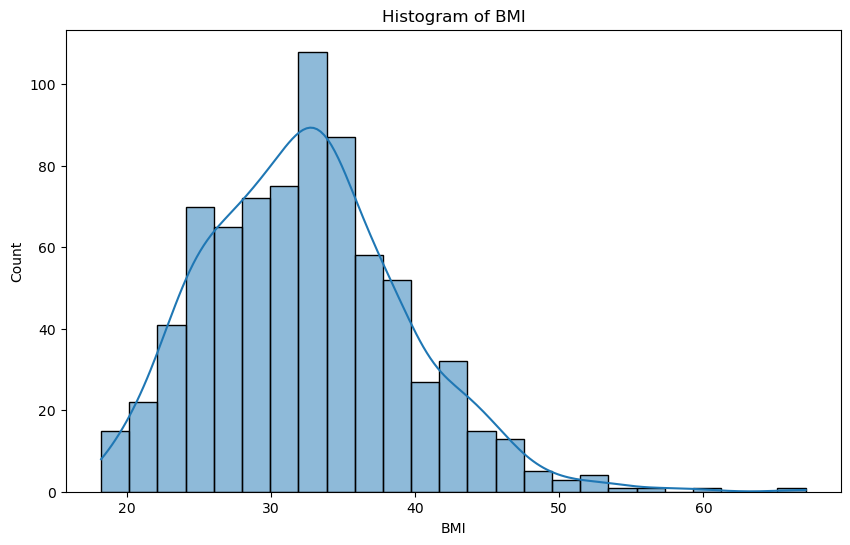

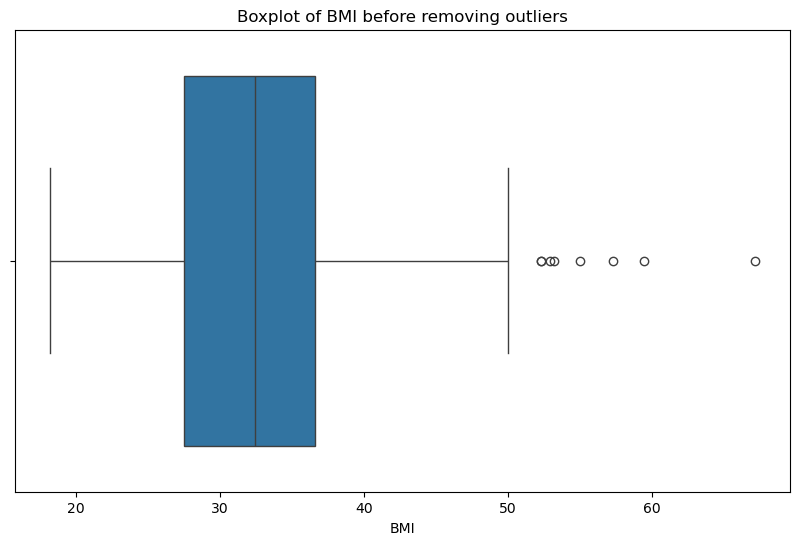

Data points remaining in BMI after outlier removal: 767


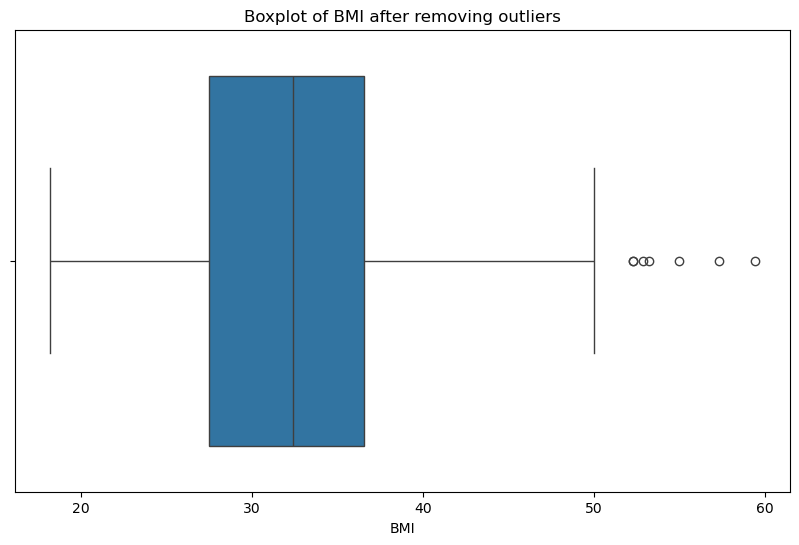


Diabetes_Pedigree - Number of missing values: 0
Diabetes_Pedigree - Unique values: [0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637
 0.833 0.229 0.817 0.204 0.368 0.743 0.722

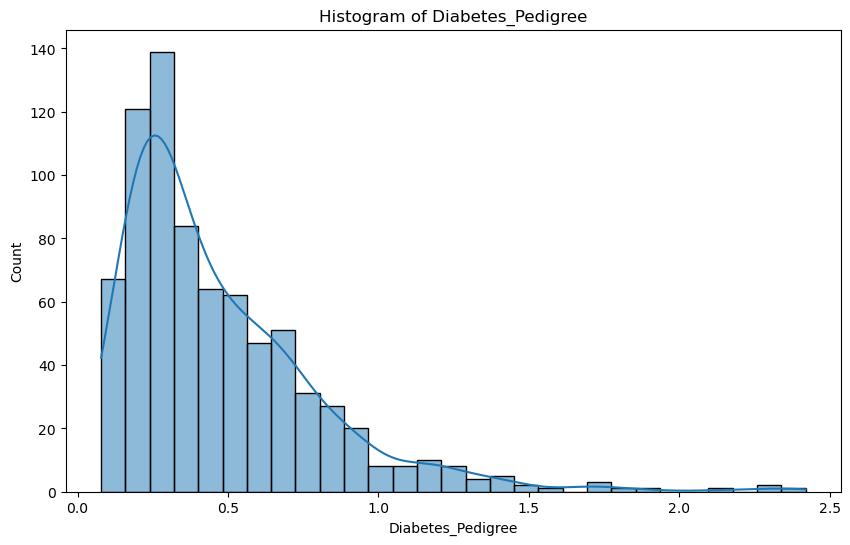

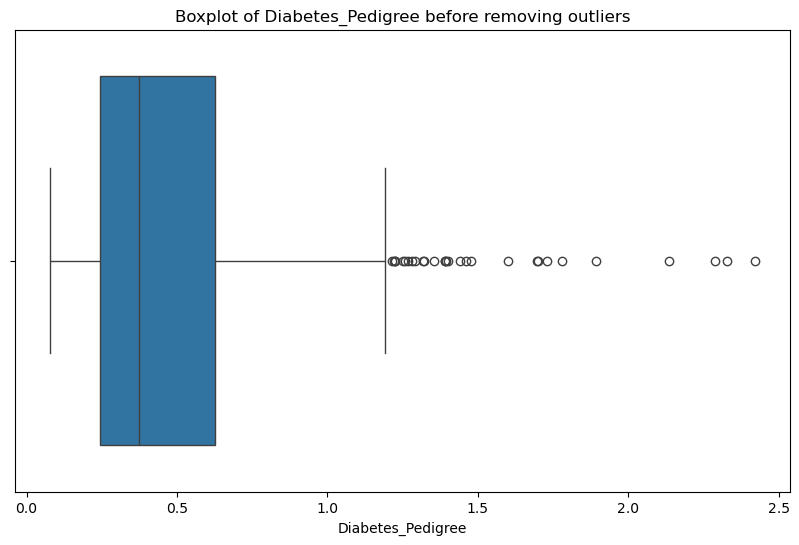

Data points remaining in Diabetes_Pedigree after outlier removal: 762


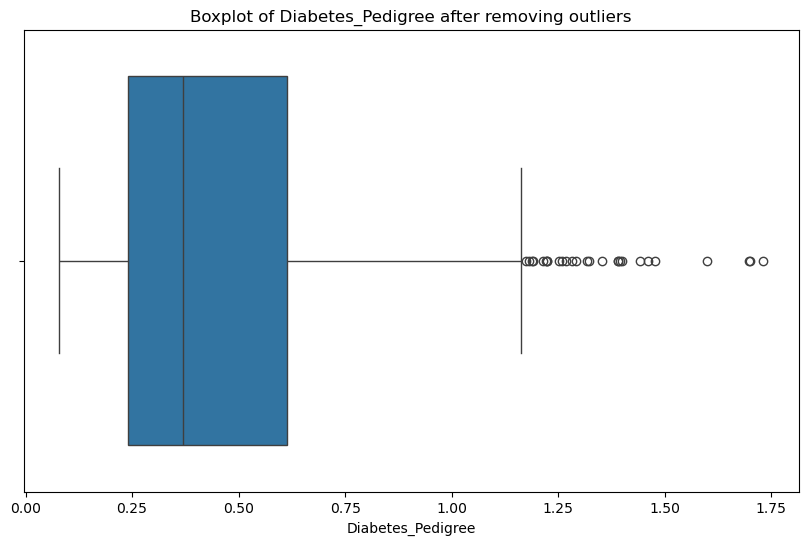


Age - Number of missing values: 0
Age - Unique values: [50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]
Age - Data type: int64


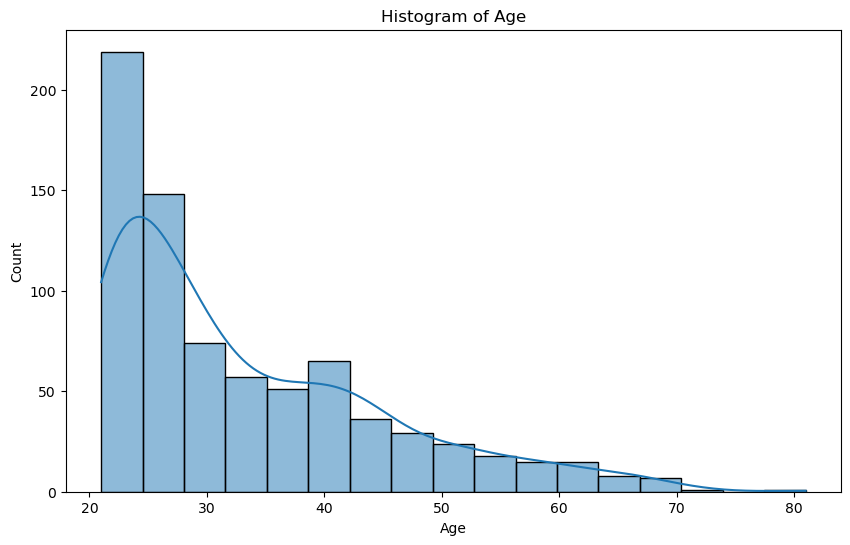

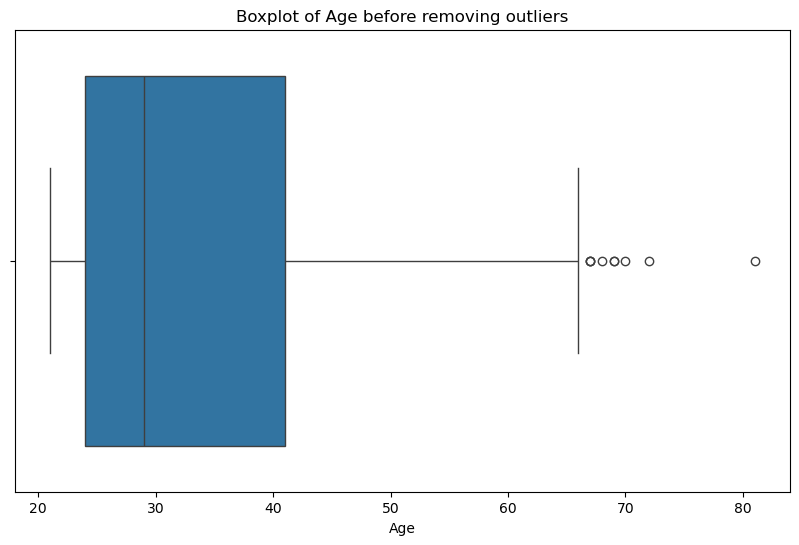

Data points remaining in Age after outlier removal: 768


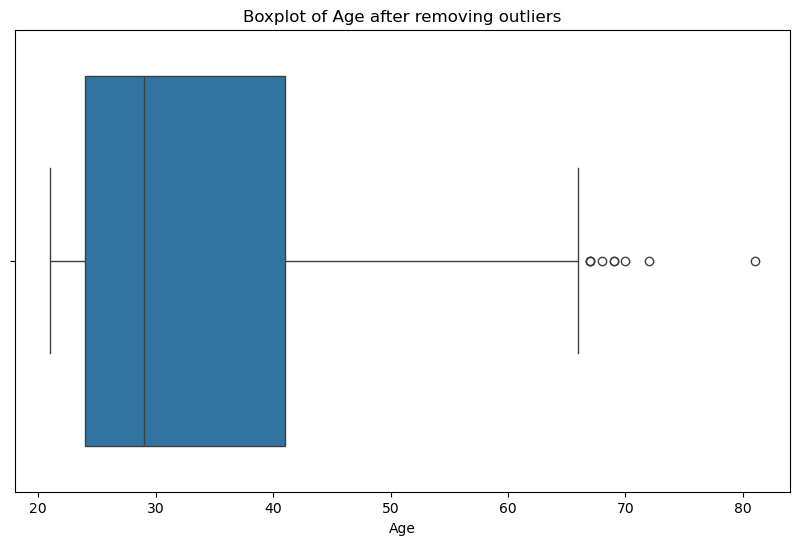

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
df = pd.read_csv('dataset.csv')
df['Pregnant'] = df['Pregnant'].fillna(df['Pregnant'].mean())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['Diastolic_BP'] = df['Diastolic_BP'].fillna(df['Diastolic_BP'].mean())
df['Skin_Fold'] = df['Skin_Fold'].fillna(df['Skin_Fold'].mean())
df['Serum_Insulin'] = df['Serum_Insulin'].fillna(df['Serum_Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Diabetes_Pedigree'] = df['Diabetes_Pedigree'].fillna(df['Diabetes_Pedigree'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Class'] = df['Class'].fillna(df['Class'].mean())
# Function to detect and remove outliers for a given column
def remove_outliers_iqr(df, column, lower_quantile=0.25, upper_quantile=0.75, multiplier=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bound
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# List of columns to check for outliers
columns_to_check = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']

# Check for missing values and unique values in each column
for column in columns_to_check:
    print(f"\n{column} - Number of missing values: {df[column].isnull().sum()}")
    print(f"{column} - Unique values: {df[column].unique()}")
    print(f"{column} - Data type: {df[column].dtype}")

    # Plot histogram to check distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

    # Detect outliers with a box plot before removing
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} before removing outliers')
    plt.show()

    # Remove outliers with a less aggressive threshold
    df_filtered = remove_outliers_iqr(df, column, multiplier=3.0)

    # Check the number of remaining data points
    print(f"Data points remaining in {column} after outlier removal: {df_filtered[column].count()}")

    # Detect outliers with a box plot after removing
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered[column])
    plt.title(f'Boxplot of {column} after removing outliers')
    plt.show()


In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Option 1: Standardization (mean = 0, variance = 1)
scaler = StandardScaler()
df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']] = scaler.fit_transform(df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']])

# Check the transformed data
print(df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']].head())

# Option 2: Min-Max Scaling (values between 0 and 1)
min_max_scaler = MinMaxScaler()
df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']] = min_max_scaler.fit_transform(df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']])

# Check the transformed data
print(df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class']].head())


   Pregnant   Glucose  Diastolic_BP     Skin_Fold  Serum_Insulin       BMI  \
0  0.639947  0.865108     -0.033518  6.655021e-01  -3.345079e-16  0.166292   
1 -0.844885 -1.206162     -0.529859 -1.746338e-02  -3.345079e-16 -0.852531   
2  1.233880  2.015813     -0.695306  8.087936e-16  -3.345079e-16 -1.332833   
3 -0.844885 -1.074652     -0.529859 -7.004289e-01  -7.243887e-01 -0.634212   
4 -1.141852  0.503458     -2.680669  6.655021e-01   1.465506e-01  1.548980   

   Diabetes_Pedigree       Age     Class  
0           0.468492  1.425995  1.365896  
1          -0.365061 -0.190672 -0.732120  
2           0.604397 -0.105584  1.365896  
3          -0.920763 -1.041549 -0.732120  
4           5.484909 -0.020496  1.365896  
   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0  0.352941  0.670968      0.489796   0.304348       0.170130  0.314928   
1  0.058824  0.264516      0.428571   0.239130       0.170130  0.171779   
2  0.470588  0.896774      0.408163   0.240798  

In [75]:
print(df.columns)


Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')


In [80]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (614, 8)
Testing data shape: (154, 8)
